In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display

In [43]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
display(df.head())

X=df.iloc[:,:df.shape[1]-1]
y=df['MEDV']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [41]:
class LinearRegressionGD(object):
    
    def __init__(self,eta=0.001,n_iter=20):
        self.eta=eta
        self.n_iter=20
        
    def fit(self,X,y):
        self.w_=np.zeros(1+X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            # 活性化関数の出力
            output=self.net_input(X)
            # 誤差を計算
            errors=(y-output)
            # 重み更新 ADALINEでの計算を行うとこのようにして、重み更新をできる。
            
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)
    

In [52]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

X_train=df[['RM']].values
y_train=df[['MEDV']].values

X_train=sc_x.fit_transform(X_train)
y_train=sc_y.fit_transform(y[:, np.newaxis]).flatten()

model=LinearRegressionGD()
model.fit(X_train,y_train)

In [47]:
y_train=sc_y.fit_transform(y[:, np.newaxis])

In [50]:
print(y_train.flatten)

<built-in method flatten of numpy.ndarray object at 0x000002ABF1CAE350>


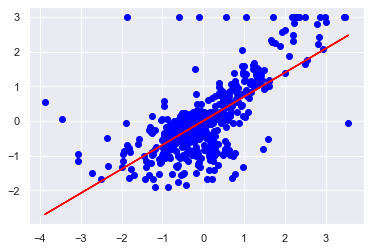

In [55]:
import seaborn as sns
sns.set()
y_pred=model.predict(X_train)
plt.scatter(X_train,y_train,c='blue')
plt.plot(X_train,y_pred,color='red')
plt.show()

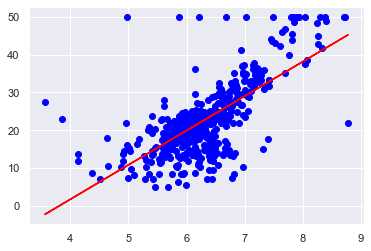

In [57]:
y_pred_true=sc_y.inverse_transform(y_pred)
X_train_true=sc_x.inverse_transform(X_train)
y_train_true=sc_y.inverse_transform(y_train)

plt.scatter(X_train_true,y_train_true,c='blue')
plt.plot(X_train_true,y_pred_true,color='red')
plt.show()
